# Logistic Regression

Algoritmo de clasificación que se utiliza para predecir la probabilidad de una variable dependiente categórica. En la regresión logística, la variable dependiente es binaria o dicotómica, es decir, solo puede tener un valor de clase de una de las dos categorías posibles. El objetivo de la regresión logística es encontrar la mejor ecuación que describa la relación entre la variable dependiente y un conjunto de variables independientes.

## Dependencias, librerías y dataset

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
df = pd.read_csv('./aoe_data_clean.csv')

## Entrenamiento del modelo

### División de los datos y visualización

In [3]:
# Prepare your dataset and split into features and target variable
X = df[['elo', 'duration', 'p1_civ', 'p2_civ']]
y = df['winner']

# Split the dataset into training and testing sets - 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

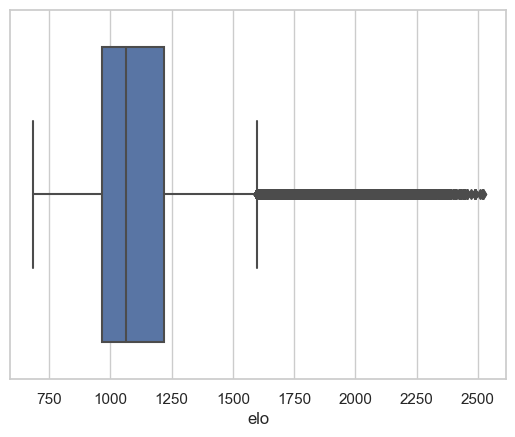

In [4]:
import seaborn as sns

# Bigotes

elo = df['elo']
sns.set(style="whitegrid")
ax = sns.boxplot(x=elo)

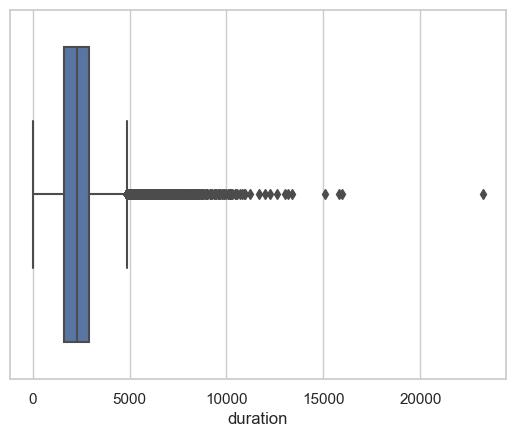

In [5]:
duration = df['duration']
sns.set(style="whitegrid")
ax = sns.boxplot(x=duration)

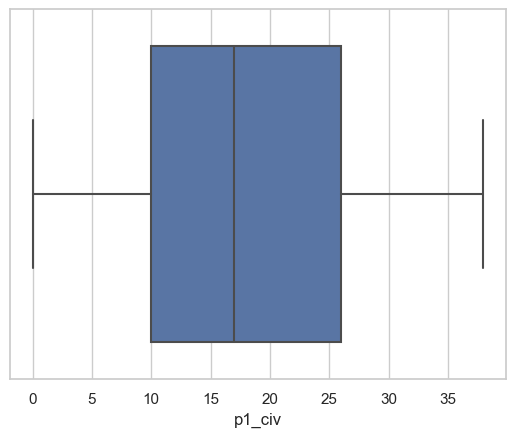

In [6]:
p1_civ = df['p1_civ']
sns.set(style="whitegrid")
ax = sns.boxplot(x=p1_civ)

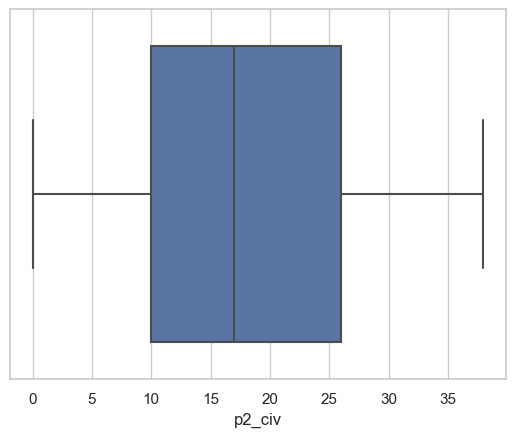

In [7]:
p2_civ = df['p2_civ']
sns.set(style="whitegrid")
ax = sns.boxplot(x=p2_civ)

### Exploración de hipermarametros

In [8]:
dummy = LogisticRegression()

params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
    }

x_subSample = X_train.sample(frac=0.05, random_state=42)
y_subSample = y_train.sample(frac=0.05, random_state=42)

lr_grid = GridSearchCV(dummy, params, cv=5, verbose=1, n_jobs=-1)

In [9]:
lr_grid.fit(x_subSample, y_subSample)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("Grid search results:")
print("---------------------")
results = lr_grid.cv_results_
print(lr_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Grid search results:
---------------------
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\DIEGO\AppData\Local\Programs\Pyt

In [11]:
# svm 

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'sigmoid', 'poly']
}

from sklearn.svm import SVC

svm_dummy = SVC()

X_entreno_sample = X_train.sample(frac=0.00005, random_state=42)
y_entreno_sample = y_train.sample(frac=0.00005, random_state=42)

svm_grid = GridSearchCV(svm_dummy, params, cv=3, verbose=2, n_jobs=-1)

9
9


In [12]:
svm_grid.fit(X_entreno_sample, y_entreno_sample)

print("Grid search results:")
print("---------------------")
results = svm_grid.cv_results_
print(svm_grid.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Grid search results:
---------------------
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


### Entrenamiento del modelo y métricas	

In [10]:
# {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

recommender = LogisticRegression(C=1, penalty='l2', solver='newton-cg')

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

recommender.fit(X_train, y_train)

y_pred = recommender.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("F1 Score: {}".format(f1_score(y_test, y_pred)))

Accuracy: 0.5103294746215494
Recall: 0.8823016564952049
Precision: 0.5119384864427358
F1 Score: 0.6479288046609899


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [13]:
svm_recommender = SVC(C=0.1, gamma=1, kernel='rbf')

svm_recommender.fit(X_train, y_train)

y_pred = svm_recommender.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("F1 Score: {}".format(f1_score(y_test, y_pred)))

## Trabajo de predicción

* _0_  -      Vikings
* _1_  -      Britons
* _2_  -      Chinese
* _3_  -       Mayans
* _4_  -      Berbers
* _5_  -        Khmer
* _6_  -       Cumans
* _7_  -         Huns
* _8_  -        Malay
* _9_  -   Ethiopians
* _10_  -      Magyars
* _11_  -       Franks
* _12_  -       Tatars
* _13_  -        Slavs
* _14_  -        Celts
* _15_  -      Mongols
* _16_  -      Teutons
* _17_  -      Koreans
* _18_  -       Aztecs
* _19_  -        Goths
* _20_  -        Turks
* _21_  -     Japanese
* _22_  -     Persians
* _23_  -      Indians
* _24_  -     Saracens
* _25_  -  Burgundians
* _26_  -   Bulgarians
* _27_  -   Byzantines
* _28_  -  Lithuanians
* _29_  -    Sicilians
* _30_  -      Malians
* _31_  -   Portuguese
* _32_  -      Spanish
* _33_  -   Vietnamese
* _34_  -     Italians
* _35_  -      Burmese
* _36_  -        Poles
* _37_  -        Incas
* _38_  -    Bohemians

In [ ]:
civilizations = {
    0: 'Vikings',
    1: 'Britons',
    2: 'Chinese',
    3: 'Mayans',
    4: 'Berbers',
    5: 'Khmer',
    6: 'Cumans',
    7: 'Huns',
    8: 'Malay',
    9: 'Ethiopians',
    10: 'Magyars',
    11: 'Franks',
    12: 'Tatars',
    13: 'Slavs',
    14: 'Celts',
    15: 'Mongols',
    16: 'Teutons',
    17: 'Koreans',
    18: 'Aztecs',
    19: 'Goths',
    20: 'Turks',
    21: 'Japanese',
    22: 'Persians',
    23: 'Indians',
    24: 'Saracens',
    25: 'Burgundians',
    26: 'Bulgarians',
    27: 'Byzantines',
    28: 'Lithuanians',
    29: 'Sicilians',
    30: 'Malians',
    31: 'Portuguese',
    32: 'Spanish',
    33: 'Vietnamese',
    34: 'Italians',
    35: 'Burmese',
    36: 'Poles',
    37: 'Incas',
    38: 'Bohemians'
}

mean_elo = df['elo'].mean()
mean_duration = df['duration'].mean()


def is_numeric(value):
    return isinstance(value, int)


def recommend_civilization():
    civ = input("Introduzca la civilización del enemigo: ")
    if is_numeric(civ):
        civ = int(civ)
        if civ in civilizations:
            mayor = 0
            civ_mayor = 0
            for key, value in civilizations.items():
                likelihood_of_winning = recommender.predict_proba([[mean_elo, mean_duration, key, civ]])[0][1]
                if likelihood_of_winning > mayor:
                    mayor = likelihood_of_winning
                    civ_mayor = key
            recommended_civ = civilizations[civ_mayor]
            print("Civilización recomendada: {}".format(recommended_civ))
        else:
            print("Civilización no válida")
    else:
        print("Entrada no válida")


stop_flag = True

while stop_flag:
    print("Elija la opción que desee:")
    print("1. Recomendar civilización")
    print("2. Mostrar civilizaciones")
    print("3. Salir")
    option = input()
    if is_numeric(option):
        option = int(option)
        if option == 1:
            recommend_civilization()
        elif option == 2:
            for key, value in civilizations.items():
                print(key, value)
        elif option == 3:
            stop_flag = False
        else:
            print("Opción no válida")
    else:
        print("Opción no válida")
